In [ ]:
import tensorflow as tf

from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np



In [ ]:
import keras

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))


Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


In [ ]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


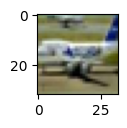

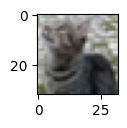

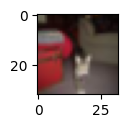

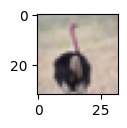

In [ ]:
for i in range(332,336):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')



X_train /= 255
X_test=X_test/255
n_classes = 10



print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten



model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))


model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())


# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))


# compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


# training the model
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))


Epoch 1/10
391/391 [==============================] - 701s 2s/step - loss: 1.6267 - accuracy: 0.3992 - val_loss: 1.2330 - val_accuracy: 0.5696
Epoch 2/10
391/391 [==============================] - 665s 2s/step - loss: 1.1376 - accuracy: 0.5947 - val_loss: 0.9206 - val_accuracy: 0.6789
Epoch 3/10
391/391 [==============================] - 650s 2s/step - loss: 0.9350 - accuracy: 0.6706 - val_loss: 0.7933 - val_accuracy: 0.7261
Epoch 4/10
391/391 [==============================] - 647s 2s/step - loss: 0.8160 - accuracy: 0.7164 - val_loss: 0.7440 - val_accuracy: 0.7413
Epoch 5/10
391/391 [==============================] - 641s 2s/step - loss: 0.7349 - accuracy: 0.7429 - val_loss: 0.7252 - val_accuracy: 0.7511
Epoch 6/10
391/391 [==============================] - 625s 2s/step - loss: 0.6682 - accuracy: 0.7662 - val_loss: 0.6813 - val_accuracy: 0.7631
Epoch 7/10
391/391 [==============================] - 625s 2s/step - loss: 0.6143 - accuracy: 0.7835 - val_loss: 0.6720 - val_accuracy: 0.7689

In [ ]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)


NameError: ignored

In [ ]:
print (predictions)

In [ ]:
for image in predictions:
    print(np.sum(image))


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)


In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)

    # plot the image
    axs[i].imshow(img)

# show the plot
plt.show()
